In [27]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import os

# Task 1-merging 12 months of data into 1 file

In [21]:
Sales_Jan = pd.read_csv('Sales_Data/Sales_January_2019.csv')
Sales_Feb = pd.read_csv('Sales_Data/Sales_February_2019.csv')
Sales_Mar = pd.read_csv('Sales_Data/Sales_March_2019.csv')
Sales_Apr = pd.read_csv('Sales_Data/Sales_April_2019.csv')
Sales_May = pd.read_csv('Sales_Data/Sales_May_2019.csv')
Sales_Jun = pd.read_csv('Sales_Data/Sales_June_2019.csv')
Sales_Jul = pd.read_csv('Sales_Data/Sales_July_2019.csv')
Sales_Aug = pd.read_csv('Sales_Data/Sales_August_2019.csv')
Sales_Sep = pd.read_csv('Sales_Data/Sales_September_2019.csv')
Sales_Oct = pd.read_csv('Sales_Data/Sales_October_2019.csv')
Sales_Nov = pd.read_csv('Sales_Data/Sales_November_2019.csv')
Sales_Dec = pd.read_csv('Sales_Data/Sales_December_2019.csv')

#Sales_Jan.head()
#Sales_Dec.isnull().sum()

Sales_Jan.info()
Sales_Feb.info()
Sales_Mar.info()
Sales_Apr.info()
Sales_May.info()
Sales_Jun.info()
Sales_Jul.info()
Sales_Aug.info()
Sales_Sep.info()
Sales_Oct.info()
Sales_Nov.info()
Sales_Dec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
Order ID            9697 non-null object
Product             9697 non-null object
Quantity Ordered    9697 non-null object
Price Each          9697 non-null object
Order Date          9697 non-null object
Purchase Address    9697 non-null object
dtypes: object(6)
memory usage: 455.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12036 entries, 0 to 12035
Data columns (total 6 columns):
Order ID            12004 non-null object
Product             12004 non-null object
Quantity Ordered    12004 non-null object
Price Each          12004 non-null object
Order Date          12004 non-null object
Purchase Address    12004 non-null object
dtypes: object(6)
memory usage: 564.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15226 entries, 0 to 15225
Data columns (total 6 columns):
Order ID            15189 non-null object
Product             15189 non-null object
Quantity Ord

In [24]:
Sales_Dec.keys() # to get Column Names

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [25]:
frame = [Sales_Jan, Sales_Feb, Sales_Mar, Sales_Apr, Sales_May, Sales_Jun, Sales_Jul, Sales_Aug, Sales_Sep, Sales_Oct, Sales_Nov, Sales_Dec]
ts = pd.concat(frame)

In [28]:
ts.to_csv('all_data.csv', index = False) 

In [ ]:
#alternative Method
#path = "./Sales_Data"
#files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

#all_months_data = pd.DataFrame()

#for file in files:
#    current_data = pd.read_csv(path+"/"+file)
#    all_months_data = pd.concat([all_months_data, current_data])
    
#all_months_data.to_csv("all_data_copy.csv", index=False)

In [71]:
all_data = pd.read_csv('all_data.csv')
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


0.18999197217019

# Data Cleaning

In [72]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [73]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [74]:
ad_nan = all_data.dropna()
ad_nan.info()
ad_nan.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 9.9+ MB


Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [75]:
temp = ad_nan[ad_nan['Order Date'].str[0:2] == 'Or']
temp.info()
# Or is present in 355 rows
#total number of observations 186305
# as the number of Or observations is less than 1% of total observation we can mute them.
all_data = ad_nan[ad_nan['Order Date'].str[0:2] != 'Or']
all_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 1073 to 185955
Data columns (total 6 columns):
Order ID            355 non-null object
Product             355 non-null object
Quantity Ordered    355 non-null object
Price Each          355 non-null object
Order Date          355 non-null object
Purchase Address    355 non-null object
dtypes: object(6)
memory usage: 19.4+ KB


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


# Agument data with additional column

In [76]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype(int)
all_data

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1
...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
186847,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


In [89]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)


C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [90]:
#Adding sales column
all_data['Sales'] = all_data['Quantity Ordered']* all_data['Price Each']

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### Task: add a City column

In [125]:
def get_city(address):
    return address.split(',')[1]
    
def get_state(address):
    return address.split(',')[2].split(' ')[1]
    

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) +')')
all_data

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)
...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA)
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA)
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA)
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX)


# What was the best month for sales? How much was earned that Month?`

In [99]:
all_data.groupby('Month')['Sales'].sum().sort_values(ascending = False)

Month
12    4.613443e+06
10    3.736727e+06
4     3.390670e+06
11    3.199603e+06
5     3.152607e+06
3     2.807100e+06
7     2.647776e+06
6     2.577802e+06
8     2.244468e+06
2     2.202022e+06
9     2.097560e+06
1     1.822257e+06
Name: Sales, dtype: float64

In [105]:
sales_month = all_data.groupby('Month').sum()

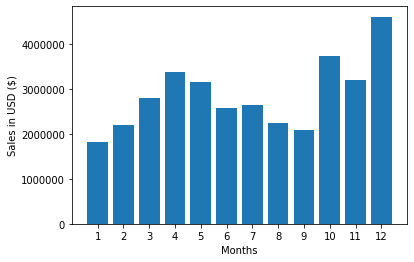

In [115]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, sales_month['Sales'])
plt.xlabel('Months')
plt.ylabel('Sales in USD ($)')
plt.xticks(months)
plt.show()


In [116]:
# In December has most numbe of Sales. As It is the Holiday season people tend to buy  more gifts. May be in april because of advertising the sales went up

In [150]:
all_data['time'] = all_data['Order Date'].apply(lambda x: get_time(x))
all_data

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,time
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21:25
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14:15
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13:33
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20:33
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11:59
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20:58
186846,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12:01
186847,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),06:43
186848,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10:39


In [174]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [177]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR)
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX)


In [178]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11
...,...,...,...,...,...,...,...,...,...,...
186845,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016",12,14.95,San Francisco (CA),20
186846,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001",12,7.68,Los Angeles (CA),12
186847,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101",12,400.00,Seattle (WA),6
186848,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001",12,11.99,Dallas (TX),10


# What City has Highest number of sales ?

In [121]:
all_data['Purchase Address']

0                944 Walnut St, Boston, MA 02215
1               185 Maple St, Portland, OR 97035
2          538 Adams St, San Francisco, CA 94016
3             738 10th St, Los Angeles, CA 90001
4                  387 10th St, Austin, TX 73301
                           ...                  
186845    14 Madison St, San Francisco, CA 94016
186846      549 Willow St, Los Angeles, CA 90001
186847          273 Wilson St, Seattle, WA 98101
186848            778 River St, Dallas, TX 75001
186849    747 Chestnut St, Los Angeles, CA 90001
Name: Purchase Address, Length: 185950, dtype: object

In [131]:
city_sales =all_data.groupby('City').sum()
city_sales


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


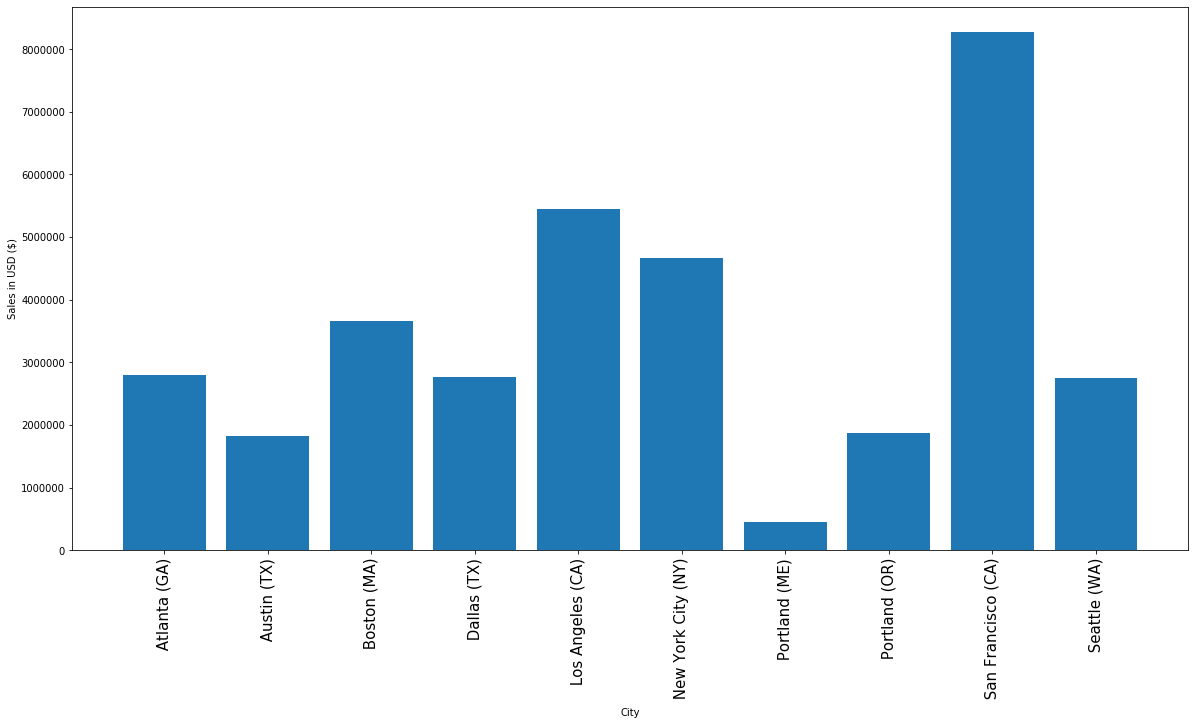

In [149]:
import matplotlib.pyplot as plt

cities = [City for City, df in all_data.groupby('City')]
plt.figure(figsize=(20,10))
plt.bar(cities, city_sales['Sales'])
plt.xlabel('City')
plt.xticks(cities, rotation ='vertical', size = 15)
plt.ylabel('Sales in USD ($)')

plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying product?

In [182]:
time_sales = all_data.groupby('Hour').sum()
time_sales

,Quantity Ordered,Price Each,Month,Sales
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


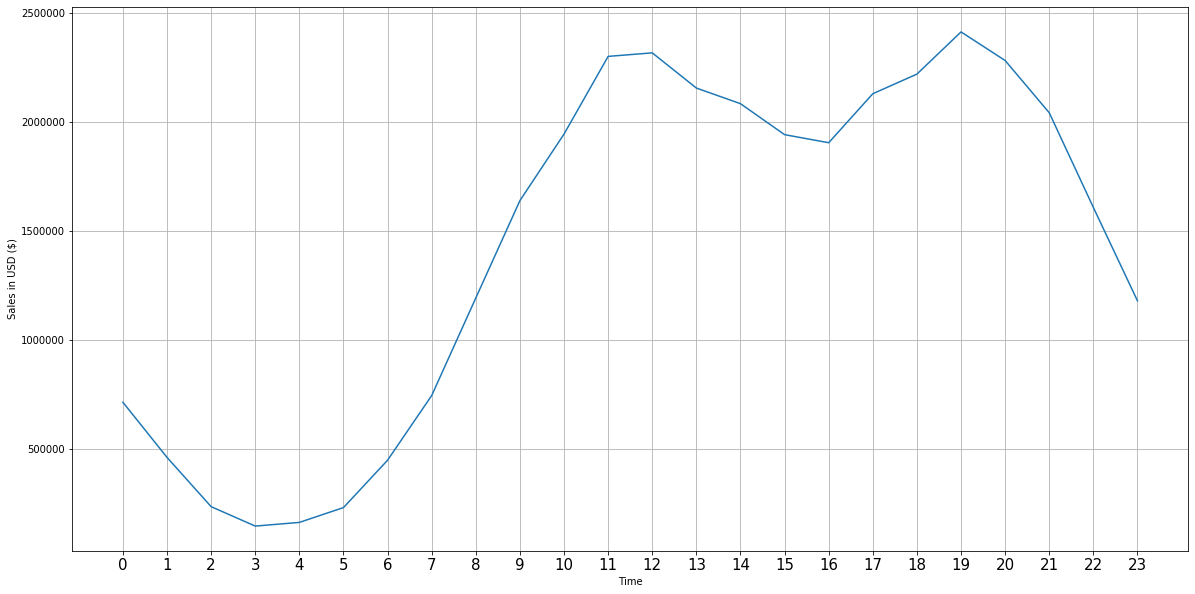

In [187]:
import matplotlib.pyplot as plt

times = range(0,24)
plt.figure(figsize=(20,10))
plt.plot(times, time_sales['Sales'])
plt.xlabel('Time')
plt.xticks(times,size = 15)
plt.ylabel('Sales in USD ($)')
plt.grid()
plt.show()

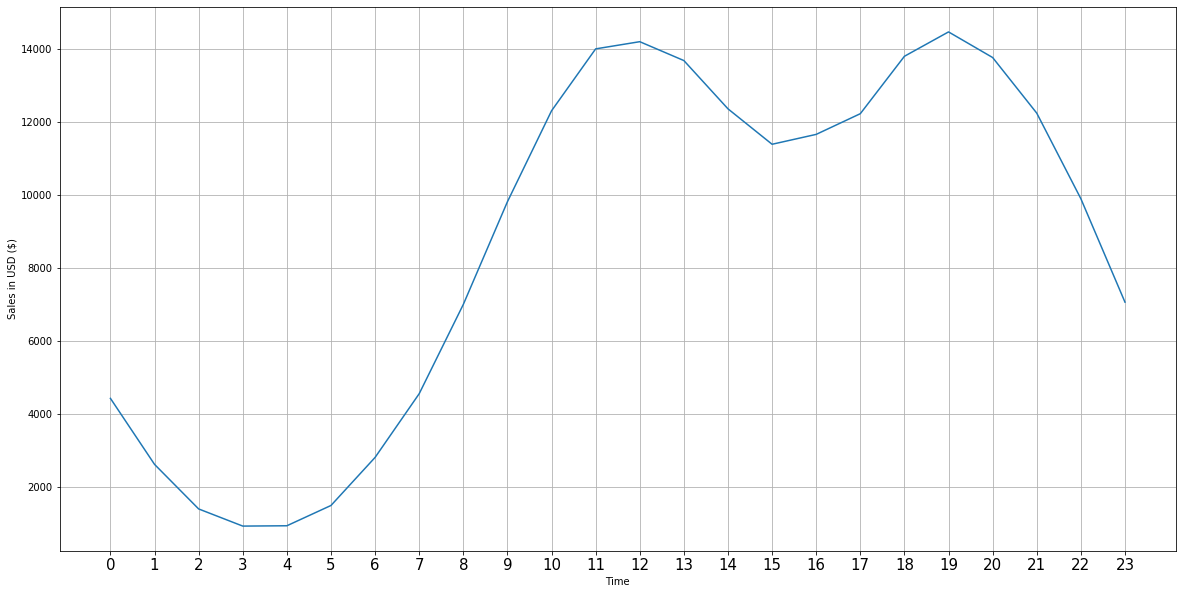

In [188]:
import matplotlib.pyplot as plt

times = range(0,24)
plt.figure(figsize=(20,10))
plt.plot(times, time_sales['Quantity Ordered'])
plt.xlabel('Time')
plt.xticks(times,size = 15)
plt.ylabel('Sales in USD ($)')
plt.grid()
plt.show()

In [ ]:
# My recommendation is slightly before 11am or 7pm
# in the early hours sales are very less.

### Question 4: What products are most often sold together?

In [197]:
#no of unique products sold
all_data.Product.nunique()

19

In [192]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston (MA),21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland (OR),14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco (CA),13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles (CA),20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin (TX),11


In [198]:
all_data.nunique()

Order ID            178437
Product                 19
Quantity Ordered         9
Price Each              17
Order Date          142395
Purchase Address    140787
Month                   12
Sales                   54
City                    10
Hour                    24
dtype: int64

In [199]:
all_data.count()

Order ID            185950
Product             185950
Quantity Ordered    185950
Price Each          185950
Order Date          185950
Purchase Address    185950
Month               185950
Sales               185950
City                185950
Hour                185950
dtype: int64

In [207]:
order_same=all_data[all_data['Order ID'].duplicated(keep=False)]#seperated the duplicates from the data set 
order_same
#step2 create a column with the unique order no and products togeather
order_same['Grouped'] = order_same.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
order_same
#remove the duplicate rows
order_same = order_same[['Order ID', 'Grouped']].drop_duplicates()
order_same

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186710,319536,"Macbook Pro Laptop,Wired Headphones"
186731,319556,"Google Phone,Wired Headphones"
186760,319584,"iPhone,Wired Headphones"
186773,319596,"iPhone,Lightning Charging Cable"


In [209]:
order_same.Grouped.nunique()

366

In [217]:
from itertools import combinations
from collections import Counter
 
count = Counter()
for row in order_same['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
  
 
for key, value in count.most_common(10):
    print(key, value)
 

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


In [245]:
all_data.groupby('Product').sum().sort_values('Quantity Ordered', ascending= False)


,Quantity Ordered,Price Each,Month,Sales,Hour
Product,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529
Wired Headphones,20557,226395.18,133397,246478.43,271720
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540
iPhone,6849,4789400.00,47941,4794300.00,98657


### What product sold the most? Why do you think it sold the most?

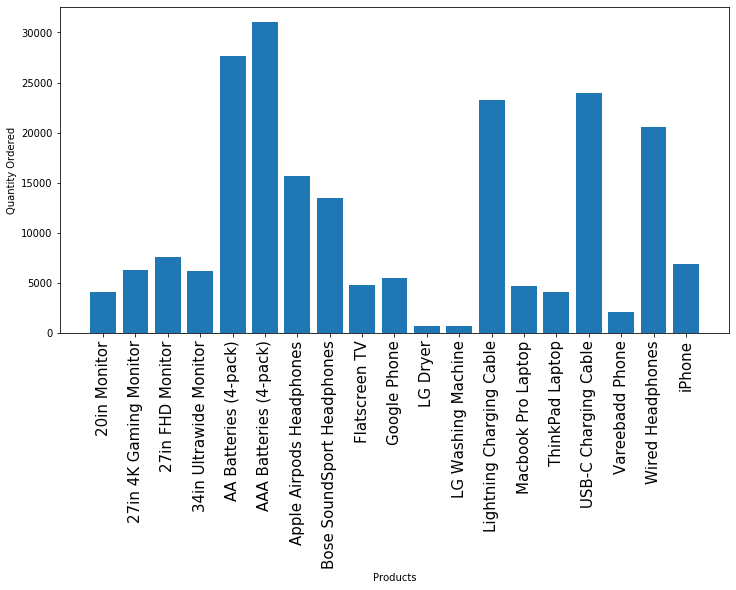

In [274]:
product_group= all_data.groupby('Product')
Quantity_Ordered = product_group.sum()['Quantity Ordered']

products= [product for product, df in product_group]

plt.figure(figsize=(12,6))
plt.bar(products, Quantity_Ordered)
plt.xlabel('Products')
plt.xticks(products , rotation ='vertical', size = 15)
plt.ylabel('Quantity Ordered')

plt.show()

In [ ]:
# AAA Batteries and AA batteries are the most sold.

In [262]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\srira\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


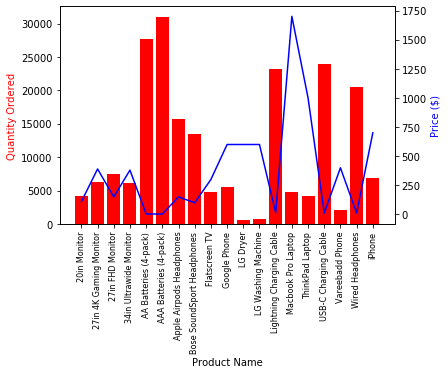

In [270]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, Quantity_Ordered, color='r')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

In [ ]:
## We can see that Whenever the quantity ordered is more the price of the item is less